In [1]:
!pip install -Uqq fastbook

In [78]:
from fastbook import *

**Segmentation DataLoader**

In [3]:
path = untar_data(URLs.CAMVID_TINY)

In [4]:
path

Path('/root/.fastai/data/camvid_tiny')

In [6]:
list(path.glob('*'))

[Path('/root/.fastai/data/camvid_tiny/images'),
 Path('/root/.fastai/data/camvid_tiny/codes.txt'),
 Path('/root/.fastai/data/camvid_tiny/labels')]

In [7]:
text = []
with open('/root/.fastai/data/camvid_tiny/codes.txt', 'r') as f:
    text.append(f.read())
text

['Animal\nArchway\nBicyclist\nBridge\nBuilding\nCar\nCartLuggagePram\nChild\nColumn_Pole\nFence\nLaneMkgsDriv\nLaneMkgsNonDriv\nMisc_Text\nMotorcycleScooter\nOtherMoving\nParkingBlock\nPedestrian\nRoad\nRoadShoulder\nSidewalk\nSignSymbol\nSky\nSUVPickupTruck\nTrafficCone\nTrafficLight\nTrain\nTree\nTruck_Bus\nTunnel\nVegetationMisc\nVoid\nWall\n']

In [10]:
list(path.glob('labels/*'))[0]

Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f04950_P.png')

In [11]:
list(path.glob('images/*'))[0]

Path('/root/.fastai/data/camvid_tiny/images/0001TP_006750.png')

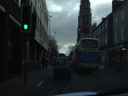

In [12]:
Image.open('/root/.fastai/data/camvid_tiny/images/0001TP_006750.png')

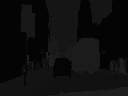

In [34]:
Image.open('/root/.fastai/data/camvid_tiny/labels/0001TP_006750_P.png')

In [39]:
np.loadtxt('/root/.fastai/data/camvid_tiny/codes.txt', dtype = str).shape

(32,)

In [47]:
path

Path('/root/.fastai/data/camvid_tiny')

In [48]:
seg_dls = SegmentationDataLoaders.from_label_func(
    path,
    fnames = get_image_files(path/'images'),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    seed = 42,
    codes = np.loadtxt(path/'codes.txt', dtype = str),
    bs = 8
)

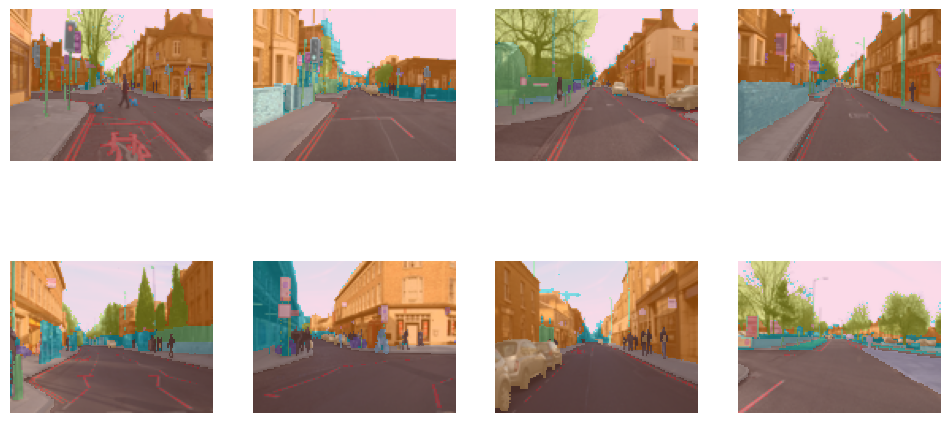

In [49]:
seg_dls.show_batch()

In [50]:
learn1 = unet_learner(seg_dls, resnet34)

In [51]:
learn1.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.934178,2.604939,00:01


epoch,train_loss,valid_loss,time
0,1.957477,1.598155,00:01
1,1.631287,1.244500,00:01
2,1.486216,1.181068,00:01
3,1.324270,0.957938,00:01
4,1.173131,0.822638,00:01
5,1.049581,0.794935,00:01
6,0.950874,0.754270,00:02
7,0.875948,0.750873,00:01


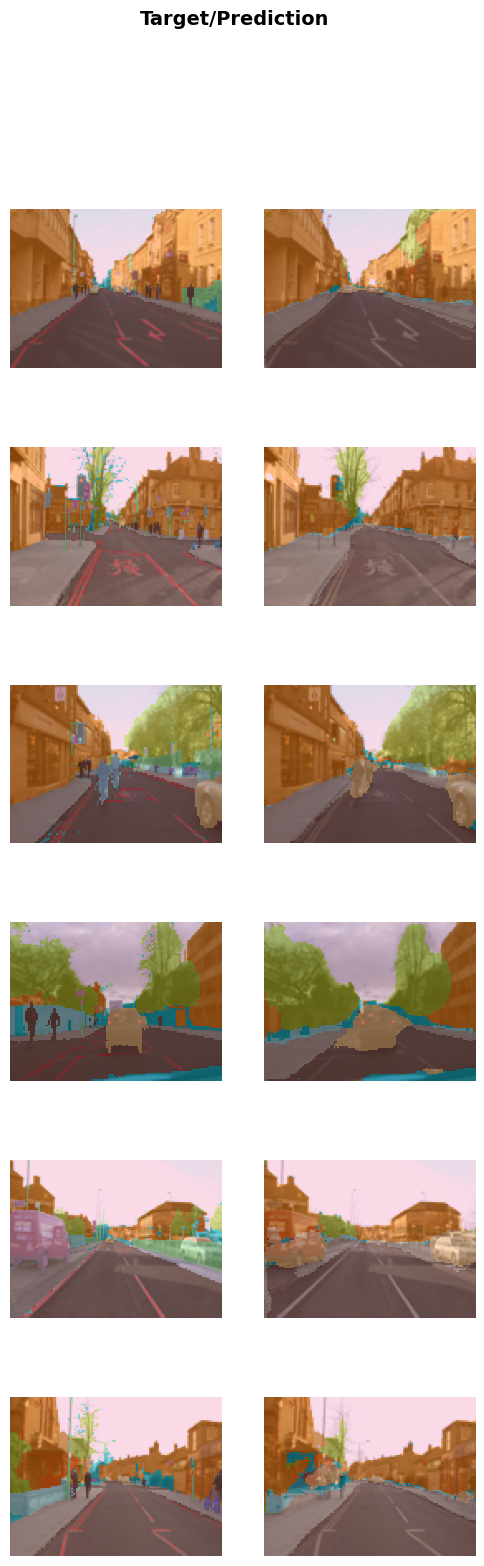

In [52]:
learn1.show_results(max_n = 6)

**Sentiment Analysis: Text DataLoaders**

In [53]:
path2 = untar_data(URLs.IMDB)
path2

Path('/root/.fastai/data/imdb')

In [55]:
list(path2.glob('*'))

[Path('/root/.fastai/data/imdb/imdb.vocab'),
 Path('/root/.fastai/data/imdb/README'),
 Path('/root/.fastai/data/imdb/unsup'),
 Path('/root/.fastai/data/imdb/test'),
 Path('/root/.fastai/data/imdb/tmp_lm'),
 Path('/root/.fastai/data/imdb/train'),
 Path('/root/.fastai/data/imdb/tmp_clas')]

In [63]:
with open('/root/.fastai/data/imdb/README', 'r') as f:
    print(f.read())

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning. 

In the entire collection, no more than 30 reviews are allowed for any
given movie because reviews for the same movie tend to have correlated
ratings. Further, the train and test sets contain a disjoint set of
movies, so no significant performance is obtained by memorizing
movie-unique terms and their associated with observed labels.  In the
labeled train/test sets, a negative review has a score <= 4 out of 10,
and a positive review has a scor

In [64]:
with open(list(path2.glob('unsup/*'))[1], 'r') as f:
    print(f.read())

Sheesh! It is amazing how much control the Hollywood establishment has over the entire spectrum of news media. In the morning paper, I read about some new movie for the first time ever. At noon, there it is again in a news magazine I get in the mail. Then I see some "news" story about it at six o'clock, and later on in the evening there's some story about one of the stars, and later again, an interview with the director and so on. The next day, the movie opens in a theater near you... and it turns out to be one mediocre dog doo of a flick that's begging seats in the "dollar theatre" a month later, only to be forgotten by year's end.<br /><br />Then, there are movies like this one. <br /><br />I'd never heard of it when I happened by chance to see it at a friend's house. <br /><br />And I'll never forget it. What a masterpiece!<br /><br />If you're a musician, and especially if your first instrument was a hand-me-down, you might appreciate the peculiar tendency of a musical instrument t

In [67]:
list(path2.glob('test/*'))

[Path('/root/.fastai/data/imdb/test/neg'),
 Path('/root/.fastai/data/imdb/test/labeledBow.feat'),
 Path('/root/.fastai/data/imdb/test/pos')]

In [71]:
list(path2.glob('tmp_lm/*'))

[Path('/root/.fastai/data/imdb/tmp_lm/valid_lbl.npy'),
 Path('/root/.fastai/data/imdb/tmp_lm/itos.pkl'),
 Path('/root/.fastai/data/imdb/tmp_lm/train_lbl.npy'),
 Path('/root/.fastai/data/imdb/tmp_lm/valid_ids.npy'),
 Path('/root/.fastai/data/imdb/tmp_lm/train_ids.npy'),
 Path('/root/.fastai/data/imdb/tmp_lm/classes.txt')]

In [72]:
with open('/root/.fastai/data/imdb/tmp_lm/classes.txt', 'r') as f:
    print(f.read())

0



In [79]:
from fastai.text.all import *

In [83]:
text_dls = TextDataLoaders.from_folder(path2, valid = 'test')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [84]:
text_dls.show_batch()

,text,category
0,"xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules of the match , both opponents have to go through tables in order to get the win . xxmaj benoit and xxmaj guerrero heated up early on by taking turns hammering first xxmaj spike and then xxmaj bubba xxmaj ray . a xxmaj german xxunk by xxmaj benoit to xxmaj bubba took the wind out of the xxmaj dudley brother . xxmaj spike tried to help his brother , but the referee restrained him while xxmaj benoit and xxmaj guerrero",pos
1,"xxbos xxmaj some have praised _ xxunk _ as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n\n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack staff "" of many older adventure movies has been done well before , ( think _ the xxmaj dirty xxmaj dozen _ ) but _ atlantis _ represents one of the worse films in that motif . xxmaj the characters are weak . xxmaj even the background that each member trots out seems stock and awkward at best . xxmaj an xxup md / xxmaj medicine xxmaj man , a tomboy mechanic whose father always wanted sons , if we have not at least seen these before",neg
2,"xxbos xxmaj warning : xxmaj does contain spoilers . \n\n xxmaj open xxmaj your xxmaj eyes \n\n xxmaj if you have not seen this film and plan on doing so , just stop reading here and take my word for it . xxmaj you have to see this film . i have seen it four times so far and i still have n't made up my mind as to what exactly happened in the film . xxmaj that is all i am going to say because if you have not seen this film , then stop reading right now . \n\n xxmaj if you are still reading then i am going to pose some questions to you and maybe if anyone has any answers you can email me and let me know what you think . \n\n i remember my xxmaj grade 11 xxmaj english teacher quite well . xxmaj",pos
3,"xxbos xxmaj this movie was recently released on xxup dvd in the xxup us and i finally got the chance to see this hard - to - find gem . xxmaj it even came with original theatrical previews of other xxmaj italian horror classics like "" xxunk "" and "" beyond xxup the xxup darkness "" . xxmaj unfortunately , the previews were the best thing about this movie . \n\n "" zombi 3 "" in a bizarre way is actually linked to the infamous xxmaj lucio xxmaj fulci "" zombie "" franchise which began in 1979 . xxmaj similarly compared to "" zombie "" , "" zombi 3 "" consists of a threadbare plot and a handful of extremely bad actors that keeps this ' horror ' trash barely afloat . xxmaj the gore is nearly non - existent ( unless one is frightened of people running around with",neg
4,"xxbos xxmaj berlin - born in 1942 xxmaj margarethe von xxmaj trotta was an actress and now she is a very important director and writer . xxmaj she has been described , perhaps even unfairly caricatured , as a director whose commitment to bringing a woman 's sensibility to the screen outweighs her artistic strengths . "" rosenstrasse , "" which has garnered mixed and even strange reviews ( the xxmaj new xxmaj york xxmaj times article was one of the most negatively aggressive reviews xxmaj i 've ever read in that paper ) is not a perfect film . xxmaj it is a fine movie and a testament to a rare xxunk of successful opposition to the genocidal xxmaj nazi regime by , of all peoples , generically powerless xxmaj germans demonstrating in a xxmaj berlin street . \n\n xxmaj co - writer von xxmaj trotta uses the actual",pos
5,"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel -

In [88]:
learn2 = text_classifier_learner(text_dls, AWD_LSTM, metrics = accuracy)

In [86]:
1e-2

0.01

In [89]:
learn2.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.469290,0.391652,0.825440,02:18


epoch,train_loss,valid_loss,accuracy,time
0,0.310559,0.256701,0.892160,04:08
1,0.241564,0.365606,0.849840,04:07
2,0.183703,0.192521,0.927520,04:08
3,0.145153,0.194844,0.927760,04:07


In [90]:
learn2.show_results()

,text,category,category_
0,"xxbos xxmaj there 's a sign on xxmaj the xxmaj lost xxmaj highway that says : \n\n * major xxup spoilers xxup ahead * \n\n ( but you already knew that , did n't you ? ) \n\n xxmaj since there 's a great deal of people that apparently did not get the point of this movie , xxmaj i 'd like to contribute my interpretation of why the plot makes perfect sense . xxmaj as others have pointed out , one single viewing of this movie is not sufficient . xxmaj if you have the xxup dvd of xxup md , you can "" cheat "" by looking at xxmaj david xxmaj lynch 's "" top 10 xxmaj hints to xxmaj unlocking xxup md "" ( but only upon second or third viewing , please . ) ;) \n\n xxmaj first of all , xxmaj mulholland xxmaj drive is",pos,pos
1,"xxbos xxmaj this is one of four 1970s movies by xxup tv writer xxmaj lane xxmaj slate about sensationalistic murders in small towns . xxmaj they feature likable xxup tv personalities as police chiefs and quirky characters as town regulars , including light - touch love interests . xxmaj the others are : xxmaj they xxmaj only xxmaj kill xxmaj their xxmaj masters ( james xxmaj garner , 1972 ) ; and xxmaj the xxmaj girl xxmaj in xxmaj the xxmaj empty xxmaj grave and xxmaj deadly xxmaj game ( both xxmaj andy xxmaj griffith , 1977 ) . \n\n xxmaj alda 's is set near xxmaj vermont ( "" mount xxmaj angel "" next to "" horse xxmaj creek "" ) ; the others in xxmaj california , xxmaj garner 's at seaside ( "" eden xxmaj landing "" ) and xxmaj griffith 's in the mountains ( """,neg,neg
2,"xxbos xxmaj possible xxmaj spoilers xxmaj as xxmaj peter xxmaj jackson has so brilliantly shown in his ` lord of the xxmaj rings ' trilogy , it is quite possible to make good films , even great ones , within the heroic fantasy genre . xxmaj the genre has distinguished literary antecedents , dating back to the mediaeval chivalric romances , particularly the xxmaj arthurian legends , upon which xxmaj tolkien and other authors have drawn . ` lord of the xxmaj rings ' apart , however , it is difficult to think of any other sword - and - sorcery films which are any good . i would agree with the reviewer who said that the best of a bad bunch was xxmaj ron xxmaj howard 's ` willow ' , and even that achieved little distinction other than that of being a merely mediocre film as opposed to",neg,neg
3,"xxbos xxmaj you do n't review xxmaj james xxmaj bond movies , you evaluate them , rate them according to how well they meet expectations . xxmaj there are certain things one has come to expect , even demand of a xxmaj bond film and each individual effort either delivers or it does n't . xxmaj so , here are ten elements that make a xxmaj bond film a xxmaj bond film . xxmaj and even though xxup never xxup say xxup never xxup again is not technically part of the official xxmaj bond filmography , the mere presence of xxmaj sean xxmaj connery returning as 007 makes it something more than merely an honorary member of the series . xxmaj anyway , here 's how it rates on a scale of 1 to 10 : \n\n xxmaj title : xxup never xxup say xxup never xxup again : xxmaj",pos,pos
4,"xxbos xxmaj may 2nd : someone clicked 11 nos , and then proceeded to do 15 more on my previous 15 comments : almost as funny as this turkey ! \n\n xxmaj may 1st : \n\n xxmaj as i write this , xxmaj i 'm still very much under the impression of what must be the funniest thriller xxmaj i 've ever seen . xxmaj i 've got a major case of the giggles , but xxmaj i 'll try and calm down . ( it 's kind of hard to write when your nose spills snot and the mouth ejects sporadic drool onto the keyboard . ) \n\n a pair of young women who just returned from a vacation take a ride on a shuttle bus . a couple of young guys join them . xxmaj but the bus is n't really a taxi service : it 's a",neg,neg
5,"xxbos xxmaj yeah , what did i expect ? i thought this would be a film about young adults at their turning - point in life , something like "" xxunk "" or "" american xxmaj pie "" , whi

In [91]:
learn2.predict('I had a terrible experience at this restaurant. The staff was rude and unhelpful, and the food was mediocre at best. I would not recommend this place to anyone.')

('neg', tensor(0), tensor([0.9978, 0.0022]))

In [92]:
learn2.predict('The staff was great. The receptionists were very helpful and answered all our questions. The room was clean and bright, and the room service was always on time')

('pos', tensor(1), tensor([0.0063, 0.9937]))

In [93]:
path3 = untar_data(URLs.ADULT_SAMPLE)

In [97]:
list(path3.glob('*'))

[Path('/root/.fastai/data/adult_sample/models'),
 Path('/root/.fastai/data/adult_sample/adult.csv'),
 Path('/root/.fastai/data/adult_sample/export.pkl')]

In [99]:
df = pd.read_csv('/root/.fastai/data/adult_sample/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [101]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [102]:
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [103]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [104]:
df.occupation.value_counts()

 Prof-specialty       4073
 Craft-repair         4028
 Exec-managerial      4009
 Adm-clerical         3720
 Sales                3590
 Other-service        3247
 Machine-op-inspct    1968
 ?                    1820
 Transport-moving     1566
 Handlers-cleaners    1347
 Farming-fishing       977
 Tech-support          905
 Protective-serv       643
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [105]:
df.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [106]:
df.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [107]:
df.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [108]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [100]:
from fastai.tabular.all import *

In [111]:
tabular_dls = TabularDataLoaders.from_csv(
    path3/'adult.csv',
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    y_names = 'salary',
    procs = [Categorify, FillMissing, Normalize]
)

In [112]:
tabular_dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,False,59.000000,108764.999230,9.0,<50k
1,Private,Some-college,Never-married,Other-service,Own-child,White,False,25.000000,126133.000661,10.0,<50k
2,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,False,52.999999,205005.000004,13.0,>=50k
3,Local-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,White,False,51.000000,123010.997316,14.0,>=50k
4,Private,Some-college,Divorced,Other-service,Unmarried,White,False,31.000000,164568.999957,10.0,<50k
5,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,False,53.999999,449256.999292,9.0,<50k
6,Self-emp-not-inc,7th-8th,Widowed,Farming-fishing,Unmarried,White,False,66.000000,28060.996311,4.0,<50k
7,Private,Some-college,Never-married,Sales,Own-child,Black,False,22.000000,183257.000090,10.0,<50k
8,Private,12th,Married-civ-spouse,Craft-repair,Husband,White,False,30.000000,142675.001037,8.0,<50k
9,Private,Assoc-acdm,Married-civ-spouse,Exec-managerial,Husband,White,False,44.000000,131649.998058,12.0,>=50k


In [113]:
learn3 = tabular_learner(tabular_dls, metrics = accuracy)

In [114]:
learn3.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.385804,0.367137,0.829545,00:05
1,0.366010,0.355919,0.836916,00:04
2,0.352995,0.349998,0.838759,00:04


In [115]:
learn3.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,13.0,3.0,11.0,1.0,5.0,1.0,-0.186953,-0.594259,1.538598,1.0,1.0
1,5.0,12.0,3.0,8.0,1.0,5.0,1.0,0.105892,0.082277,-0.424747,1.0,0.0
2,5.0,10.0,3.0,11.0,1.0,5.0,1.0,0.984425,-0.404467,1.145929,1.0,1.0
3,5.0,16.0,5.0,9.0,5.0,3.0,1.0,0.032681,-0.288477,-0.032078,0.0,0.0
4,5.0,2.0,3.0,4.0,1.0,5.0,1.0,-0.479797,-0.467166,-1.210084,0.0,0.0
5,5.0,13.0,5.0,14.0,2.0,5.0,1.0,0.545158,-0.934483,1.538598,1.0,0.0
6,5.0,9.0,5.0,14.0,4.0,5.0,1.0,-1.358330,0.814133,0.360591,0.0,0.0
7,7.0,12.0,3.0,6.0,1.0,5.0,1.0,0.691580,-0.038128,-0.424747,0.0,0.0
8,5.0,12.0,3.0,8.0,1.0,5.0,1.0,0.252314,0.552104,-0.424747,1.0,0.0


**Movie Rating Prediction: Collab Filtering**

In [116]:
from fastai.collab import *

In [117]:
path4 = untar_data(URLs.ML_SAMPLE)
path4

Path('/root/.fastai/data/movie_lens_sample')

In [118]:
list(path4.glob('*'))

[Path('/root/.fastai/data/movie_lens_sample/ratings.csv')]

In [120]:
df2 = pd.read_csv(path4/'ratings.csv')
df2.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [122]:
df2.rating.value_counts()

4.0    1769
5.0    1273
3.0     988
3.5     678
4.5     643
2.0     287
2.5     206
1.0     104
1.5      59
0.5      24
Name: rating, dtype: int64

In [123]:
df2.userId.value_counts()

15     99
268    96
73     95
580    93
461    92
       ..
239    23
387    19
299    15
652    13
427    11
Name: userId, Length: 100, dtype: int64

In [126]:
df2.movieId.value_counts()

356      87
1270     83
296      82
260      80
480      79
         ..
165      44
316      43
4973     43
10       42
58559    32
Name: movieId, Length: 100, dtype: int64

In [127]:
collab_dls = CollabDataLoaders.from_csv(path4/'ratings.csv')

In [128]:
learn4 = collab_learner(collab_dls, y_range = (0.5, 5.5))

In [132]:
learn4.fit_one_cycle(30)

epoch,train_loss,valid_loss,time
0,0.605540,0.705625,00:00
1,0.604771,0.704395,00:00
2,0.608156,0.702463,00:00
3,0.611028,0.699847,00:00
4,0.607897,0.694948,00:00
5,0.591612,0.690032,00:00
6,0.587032,0.684699,00:00
7,0.583612,0.676014,00:00
8,0.553939,0.671835,00:00
9,0.543109,0.665547,00:00


In [133]:
learn4.show_results()

,userId,movieId,rating,rating_pred
0,15.0,25.0,4.5,3.193450
1,95.0,80.0,4.0,4.262197
2,11.0,14.0,4.0,3.892371
3,11.0,88.0,3.0,4.043936
4,88.0,71.0,3.5,3.947453
5,11.0,92.0,5.0,3.883834
6,55.0,79.0,3.5,3.847447
7,98.0,68.0,4.5,4.358391
8,31.0,56.0,5.0,4.719843
